# Weather Analysis
> UCB Extension Data Analytics Boot Camp Mod. 6 Challenge

## Gather Data

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [13]:
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

In [14]:
from citipy import citipy

In [15]:
#finding nearest city closest to lat and lngs.
cities=[]

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)
    

593

## OpenWeatherMap API to gather data from cities

In [59]:
from configparser import ConfigParser
config = ConfigParser()
config.read('/Users/laurenbayson/Documents/Anything Code/my Jypter work/tweets/config.ini')

api_key = config.get('Openweather','api_key')

url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

# city of Honolulu weather info
city_url = url + '&q=' +'Honolulu'

city_weather = requests.get(city_url)

city_weather.text

city_weather.json()

{'coord': {'lon': -157.8583, 'lat': 21.3069},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 75.02,
  'feels_like': 75.79,
  'temp_min': 73.89,
  'temp_max': 76.24,
  'pressure': 1017,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 70},
 'clouds': {'all': 40},
 'dt': 1649658490,
 'sys': {'type': 1,
  'id': 7878,
  'country': 'US',
  'sunrise': 1649607367,
  'sunset': 1649652526},
 'timezone': -36000,
 'id': 5856195,
 'name': 'Honolulu',
 'cod': 200}

In [60]:
city_url = url + '&q=' + 'Honolulu'
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print('City weather found.')
else:
    print('City weather not found')

City weather found.


## Gather data from JSON file, add to DataFrame

In [61]:
Honolulu_data = city_weather.json()
Honolulu_data['dt']
Honolulu_data['coord']['lat']
Honolulu_data

{'coord': {'lon': -157.8583, 'lat': 21.3069},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 75.02,
  'feels_like': 75.79,
  'temp_min': 73.89,
  'temp_max': 76.24,
  'pressure': 1017,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 70},
 'clouds': {'all': 40},
 'dt': 1649658366,
 'sys': {'type': 1,
  'id': 7878,
  'country': 'US',
  'sunrise': 1649607367,
  'sunset': 1649652526},
 'timezone': -36000,
 'id': 5856195,
 'name': 'Honolulu',
 'cod': 200}

In [62]:
lat = Honolulu_data['coord']['lat']
lng = Honolulu_data['coord']['lon']
max_temp = Honolulu_data['main']['temp_max']
humidity = Honolulu_data['main']['humidity']
clouds = Honolulu_data['clouds']['all']
windy = Honolulu_data['wind']['speed']

In [63]:
from datetime import datetime
date = Honolulu_data['dt']
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 4, 11, 6, 26, 6)

In [64]:
datetime.utcfromtimestamp(date).strftime('%y-%m-%d %H:%M:%S')

'22-04-11 06:26:06'

In [51]:

city_data=[]
print('Beginnng Data Retrieval')
print('---------------------------')

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
    
    city_url = url + '&q=' + city.replace(' ','+')
   
    print('Processing Record{record_count} of Set {set_count} | {city}')
    record_count += 1
    

    try:
      
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginnng Data Retrieval
---------------------------
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
City not found. Skipping...
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{record_count} of Set {set_count} | {city}
Processing Record{re

In [65]:
city_data = pd.DataFrame(city_data)
city_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-04-10 23:42:59,69.4541,-133.0374,3.20,66,20,16.11
1,Zeya,RU,2022-04-10 23:47:20,53.7500,127.2667,30.88,44,100,5.91
2,Torbay,CA,2022-04-10 23:47:21,47.6666,-52.7314,35.28,94,100,11.50
3,Nikolskoye,RU,2022-04-10 23:47:21,59.7035,30.7861,36.81,92,6,8.34
4,Puerto Ayora,EC,2022-04-10 23:47:22,-0.7393,-90.3518,78.55,93,96,5.01


In [66]:
column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data = city_data[column_order]
city_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-04-10 23:42:59,69.4541,-133.0374,3.20,66,20,16.11
1,Zeya,RU,2022-04-10 23:47:20,53.7500,127.2667,30.88,44,100,5.91
2,Torbay,CA,2022-04-10 23:47:21,47.6666,-52.7314,35.28,94,100,11.50
3,Nikolskoye,RU,2022-04-10 23:47:21,59.7035,30.7861,36.81,92,6,8.34
4,Puerto Ayora,EC,2022-04-10 23:47:22,-0.7393,-90.3518,78.55,93,96,5.01


## Export to CSV

In [57]:
output_data_file = 'cities.csv'
city_data.to_csv(output_data_file,index_label='City_ID')

## Does latitude affect the other variables?

In [68]:
lats = city_data['Lat']
max_temps = city_data['Max Temp']
humidity = city_data['Humidity']
cloudiness = city_data['Cloudiness']
wind_speed = city_data['Wind Speed']

import time
today = time.time()
today

1649659327.115894

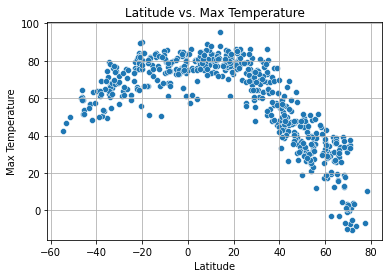

In [78]:
#lat vs max temp
sns.scatterplot(data=city_data,x='Lat',y='Max Temp')
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)
plt.show()

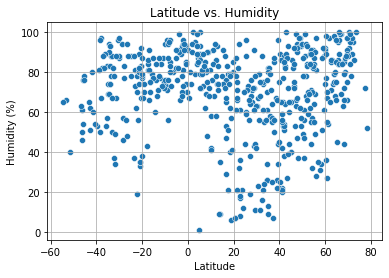

In [77]:
sns.scatterplot(data=city_data,x='Lat',y='Humidity')
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

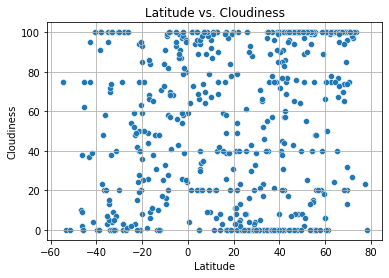

In [79]:
sns.scatterplot(data=city_data,x='Lat',y='Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.show()

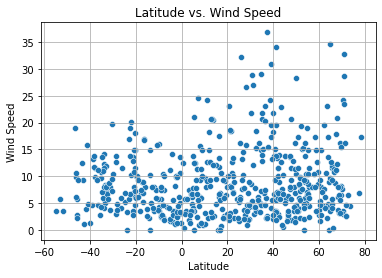

In [80]:
sns.scatterplot(data=city_data,x='Lat',y='Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

## Linear Regression: Is there a correlation?
> Northern vs Southern Hemisphere

### Maximum Temperature

In [155]:
from scipy.stats import linregress

In [156]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    


In [157]:
northern_hemi_df = city_data.loc[(city_data["Lat"] >= 0)]
southern_hemi_df = city_data.loc[(city_data["Lat"] < 0)]

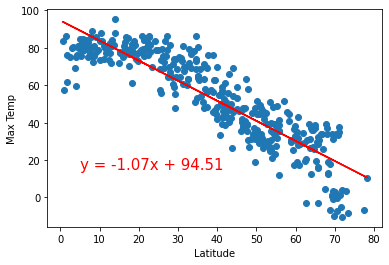

In [158]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(5,15))

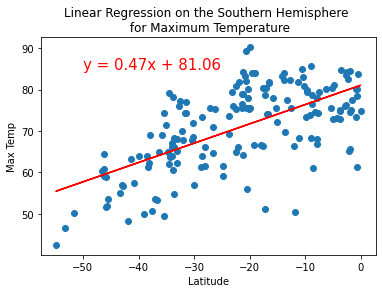

In [159]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))


### Humidity

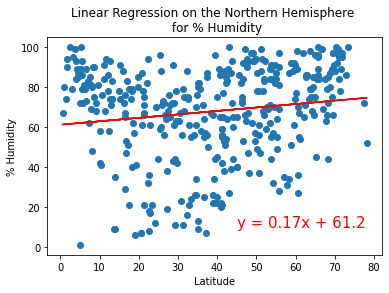

In [160]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

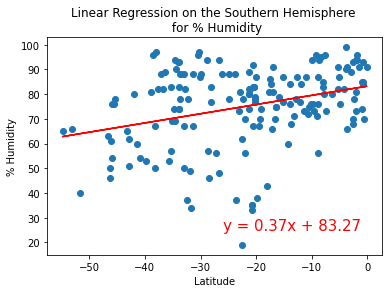

In [161]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-26,25))

### Cloudiness

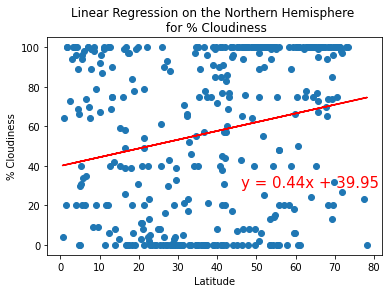

In [162]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(46,29))

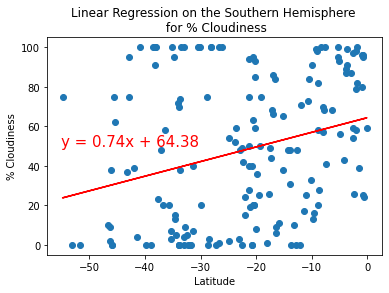

In [163]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-55,50))

### Wind Speed

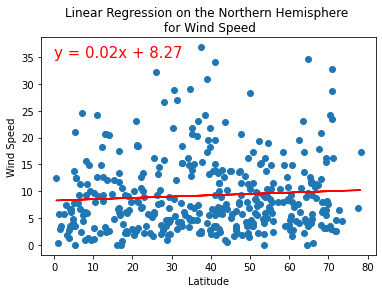

In [164]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,35))

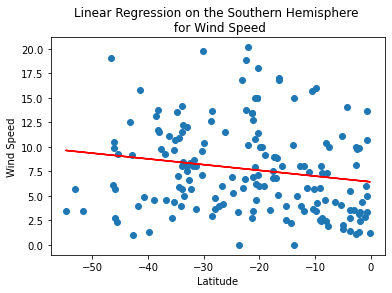

y = -0.06x + 6.44


In [175]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-55,50))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

> Max temp has the greatest correlation to latitude than the other variables